# Pymaceuticals Inc.
---

### Analysis

In this study, 249 mice who were identified with squamous cell carcinoma (SCC) tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.
Therefore, the first observation made must the statistical comparison of the tumor volumes for each drug regimen. As viewed in the Summary Statistics table, the top drug regimens with the lowest tumor volumes, based on standard deviation, are Ramicane, Capomulin, Ceftamin, and Infubinol, respectfully. The second observation is the total number of timepoints the regimens were administered. As viewed in the Mouse Timepoints Per Drug Regimen bar chart, the top two regimens, Ramicane and Capomulin, were administered over more than 200 timepoints. This shows a correlation between lower tumor volumes and the frequency of the drug administration. The third observation is viewed in the Tumor Volume Across Treatment Regimens boxplot. The boxplot shows a possibility of Infubinol reaching approximately the same final tumor volume as Ramicane and Capomulin within fewer timepoints. 

Conducting further analysis on Capomulin, the drug of interest, a clear strength and a clear weakness was identified. The clear strength of Capomulin is the significant drop in tumor volume over the course of the study. The Capomulin treatment of mouse l509 line graph shows the tumor declination of a single mouse treated with Capomulin. Based on the statistical data, this is not an outlier. However, the clear weakness of Capomulin, as viewed in the Mouse Weight vs. Average Tumor Volume, Capomulin regression chart, is that it appears to be ineffective in lowering the tumor rate in comparison to the weight of the mouse. Capomulin's specific correlation between mouse weight gain/loss will require further study.


 

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df= pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
combined_data_df.head(5)
# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [15]:
# Checking the number of mice.
totalnum_mice= combined_data_df["Mouse ID"].nunique()
totalnum_mice

249

In [16]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mouse = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dup_mouse

array(['g989'], dtype=object)

In [74]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mouse_data = combined_data_df[combined_data_df['Mouse ID'].isin(dup_mouse)]

# Display the data for the duplicate Mouse IDs
dup_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_data_df = combined_data_df[~combined_data_df['Mouse ID'].isin(dup_mouse)]

# Display the clean DataFrame
clean_combined_data_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [19]:
# Checking the number of mice in the clean DataFrame.
totalnum_mice= clean_combined_data_df["Mouse ID"].nunique()
totalnum_mice

248

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_statistics = clean_combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Assemble the resulting series into a single summary DataFrame.
summary_statistics.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Variance Tumor Volume', 'Std. Dev. Tumor Volume', 'Std. Err. Tumor Volume']
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std. Dev. Tumor Volume,Std. Err. Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

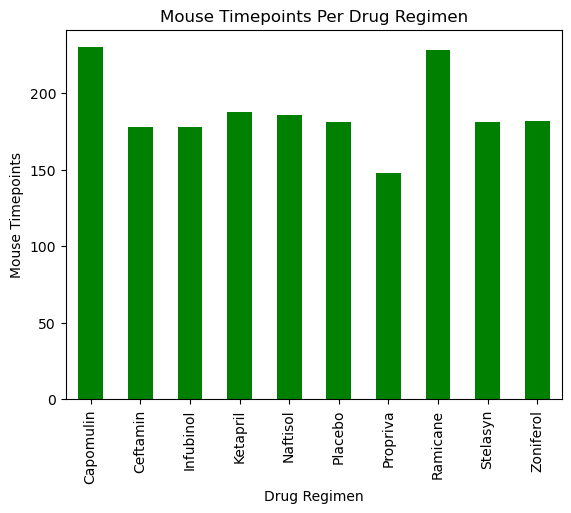

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Use group by 'Drug Regimen' and count the number of rows for each drug regimen.
drug_counts = clean_combined_data_df.groupby('Drug Regimen').size()

# Create a bar plot
drug_counts.plot(kind='bar', color='green')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Mouse Timepoints')
plt.title('Mouse Timepoints Per Drug Regimen')

# Display the plot
plt.show()

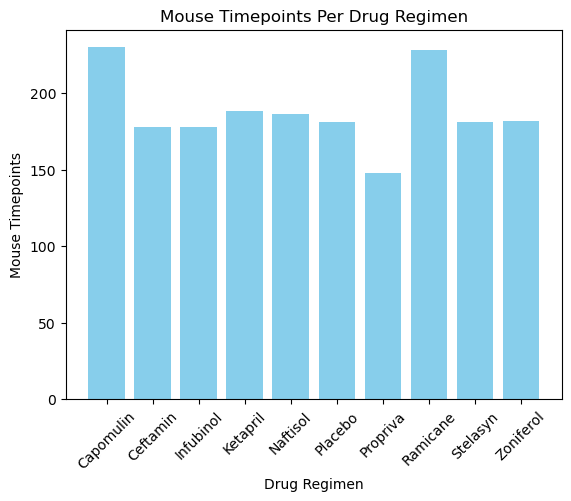

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Use group by 'Drug Regimen' and count the number of rows for each regimen
drug_counts = clean_combined_data_df.groupby('Drug Regimen').size()

# Create a bar plot using pyplot
plt.bar(drug_counts.index, drug_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Mouse Timepoints')
plt.title('Mouse Timepoints Per Drug Regimen')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

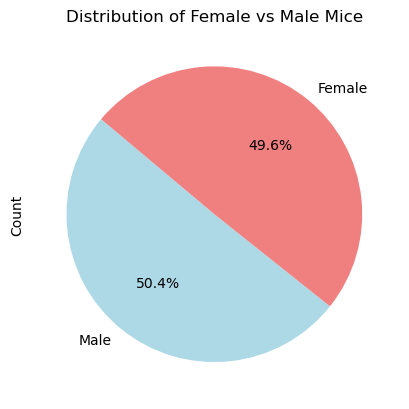

In [23]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = clean_combined_data_df.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()

# Make the pie chart using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])

plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.ylabel('Count')  
plt.show()

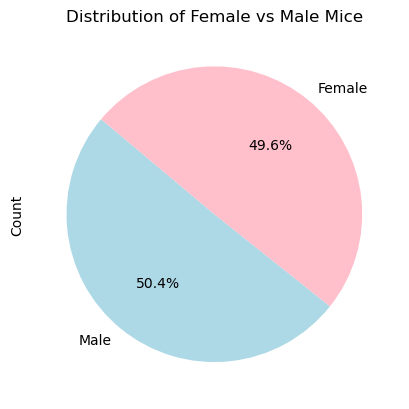

In [24]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = clean_combined_data_df.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()
# Make the pie chart using pyplot
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'pink'])

# Add a title
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.ylabel('Count') 
plt.show()

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Get the last (greatest) timepoint for each mouse 
last_gr_timepoint = clean_combined_data_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint 
tum_vol_merge_df = pd.merge(last_gr_timepoint, clean_combined_data_df, on=['Mouse ID', 'Timepoint'], how='left')

fin_tum_vol_fr_dr=tum_vol_merge_df[tum_vol_merge_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [49]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = tum_vol_merge_df[tum_vol_merge_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Calculate the IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print potential outliers
    print(f"{treatment}'s potential outliers: {outliers}")
    
    # Add subsetfor plotting
    tumor_vol_data.append(treatment_data)
  

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


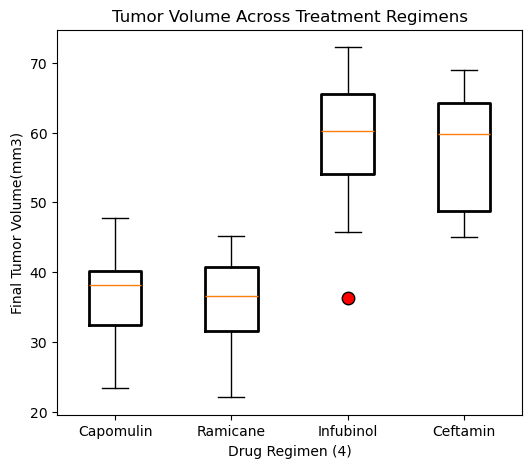

In [58]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(6, 5))
boxprops = dict(linestyle='-', linewidth=2, color='black')
flierprops = dict(marker='o', markerfacecolor='red', markersize=9)
plt.boxplot(tumor_vol_data, labels=treatments, boxprops=boxprops, flierprops=flierprops)

# Add title and labels
plt.title('Tumor Volume Across Treatment Regimens')
plt.xlabel('Drug Regimen (4)')
plt.ylabel('Final Tumor Volume(mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

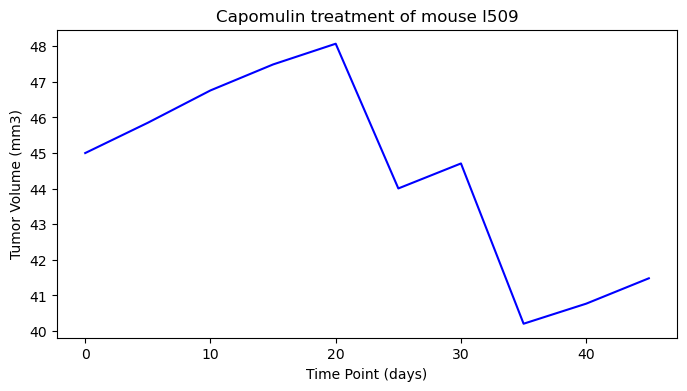

In [66]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
treatment = 'Capomulin'

# Filter the data for the specific mouse and treatment
mouse = clean_combined_data_df[(clean_combined_data_df['Mouse ID'] == mouse_id) & (clean_combined_data_df['Drug Regimen'] == treatment)]


plt.figure(figsize=(8, 4))
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], linestyle='-', color='b')

# Add title and labels
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')


# Show the plot
plt.show()

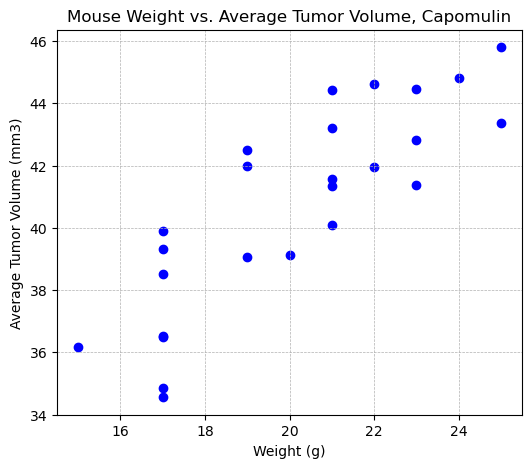

In [86]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_combined_data_df[clean_combined_data_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
avg_tumor_vol = avg_tumor_vol.rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Volume (mm3)'})

# Merge with the original DataFrame to get the mouse weight
mouse_weight = clean_combined_data_df[['Mouse ID', 'Weight (g)']].drop_duplicates()
weight_vs_avg_tum = pd.merge(avg_tumor_vol, mouse_weight, on='Mouse ID')


plt.figure(figsize=(6, 5))
plt.scatter(weight_vs_avg_tum['Weight (g)'], weight_vs_avg_tum['Avg Tumor Volume (mm3)'], color='blue')

# Add title and labels
plt.title('Mouse Weight vs. Average Tumor Volume, Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Add grid for better pattern readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


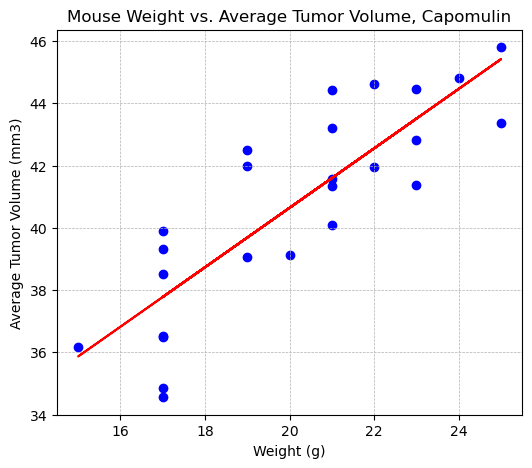

In [85]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

correlation = weight_vs_avg_tum['Weight (g)'].corr(weight_vs_avg_tum['Avg Tumor Volume (mm3)'])
formatted_correlation = f'{correlation:.2f}'
print(f'The correlation between mouse weight and the average tumor volume is: {formatted_correlation}')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(weight_vs_avg_tum['Weight (g)'], weight_vs_avg_tum['Avg Tumor Volume (mm3)'])

plt.figure(figsize=(6, 5))
plt.scatter(weight_vs_avg_tum['Weight (g)'], weight_vs_avg_tum['Avg Tumor Volume (mm3)'], color='b', label='Data')

# Plot the linear regression line
plt.plot(weight_vs_avg_tum['Weight (g)'], slope * weight_vs_avg_tum['Weight (g)'] + intercept, color='r', label='Fitted line')

# Add title and labels
plt.title('Mouse Weight vs. Average Tumor Volume, Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Add grid for better data readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()